<IPython.core.display.Javascript object>


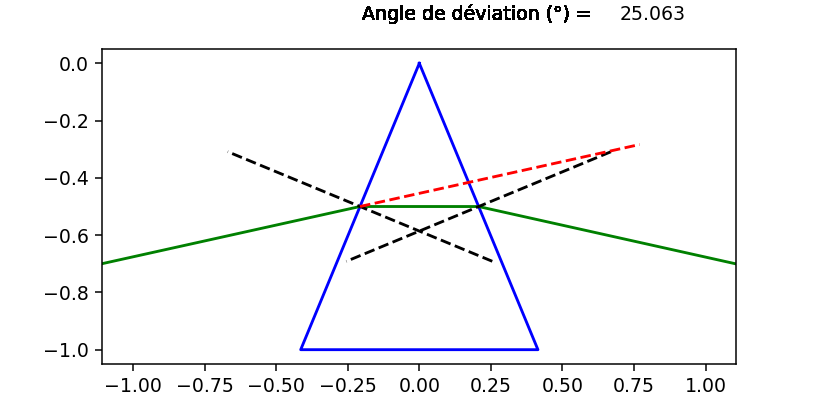

interactive(children=(FloatSlider(value=1.5, description='n', max=1.8, min=1.2, step=0.01), IntSlider(value=45…

In [1]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot as plt
#from matplotlib.patches import Polygon
#from defs_optique import dessine_rapporteur
from numpy import *
# interact prend en argument une fonction et ses valeurs possibles
from ipywidgets import interact


def rayon(n, A, theta1):
    # A et theta1 de degrés à radians
    A = A*pi/180 
    theta1 = theta1*pi/180
    # données du tracé
    theta1prime = arcsin(sin(theta1)/n)  # angle de réfraction
    alpha2 = theta1prime - A/2           # pente du rayon intérieur
    theta2prime =   alpha2 - A/2         # angle d'incidence sur face 2
    normale2 = True                      # test tracé de la normale du rayon sortant
    alpha1 = theta1 - A/2                # angle incidence par rapport à l'horizontal
    p = tan(A/2)                         # on aura besoin de cette grandeur plusieurs fois

    # calcul des points P du rayon et des normales
    y1 = -0.5                                    # point P2
    x1 = y1*p                                    # point P2
    x0, y0 = x1 - cos(alpha1), y1 - sin(alpha1)  # point P1
    x = [x0, x1]                                 # rayon P1P2
    y = [y0, y1]                                 # rayon P1P2
    x5 = x1 + cos(alpha1)                        # point P5 pour direction rayon incident et définir déviation
    y5 = y1 + sin(alpha1)                        # point P5 pour direction rayon incident et définir déviation

    if (alpha2<A/2-pi/2):        # si le rayon intérieur ne ressort pas
        x += [x[1] + cos(alpha2)]
        y += [y[1] + sin(alpha2)]
        normale2 = False
    else:                        # si le rayon intérieur ressort
        t2 = tan(alpha2)
        x += [(x[1] * t2-y[1])/(1/p+t2)]         # point P3
        y += [y[1] + (x[2]-x[1])*t2]             # point P3
        # mettre le rayon réfléchi en cas de réflexion totale
        x6 = x[2] - 0.3*cos(alpha2-2*theta2prime)  # point P6 pour rayon réfléchi à revoir !
        y6 = y[2] - 0.3*sin(alpha2-2*theta2prime)  # point P6 pour rayon réfléchi

        if(abs(n*sin(theta2prime))<1):  # si pas de réflexion totale
            theta2 = arcsin(n*sin(theta2prime))
            alpha3 = theta2 + A/2
            x += [x[2] + cos(alpha3)]            # point P4
            y += [y[2] + sin(alpha3)]            # point P4
            normale2 = True
        else :
            normale2 = False

    # angle de déviation
    if normale2 == True :
        D = alpha1 - alpha3
        #print("Déviation en ° = ", D*180/pi)
    else :
        # à calculer si réflexion totale
        D = 0

    # les points P
    return(x, y, x5, y5, x6, y6, D, A, normale2)

        
def dessin(x, y , x5, y5, x6, y6, D, A, normale2):
    # affiche le rayon
    line.set_data(x, y)
    # afficher la normale entrante et sortante
    norm1.set_data([x[1]+0.5*cos(A/2),x[1]-0.5*cos(A/2)], [y[1]-0.5*sin(A/2), y[1]+0.5*sin(A/2)])
    norm2.set_data([x[2]+0.5*cos(A/2),x[2]-0.5*cos(A/2)], [y[2]+0.5*sin(A/2), y[2]-0.5*sin(A/2)])
    # afficher prisme
    p = tan(A/2)                         # on aura besoin de cette grandeur plusieurs fois
    prisme.set_data([0, -1*p, 1*p, 0],[0, -1, -1, 0])
    # prolongation du rayon incident
    prol.set_data([x[1], x5],[y[1], y5])
    # affichage de l'angle de déviation
    ax.text(-0.2, 0.15, "Angle de déviation (°) = ")
    dev.set_text(round(D*180/pi,3))
    # affichage du rayon réfléchi si réflexion totale
    if normale2 == False :
        reftot.set_data([x[2], x6],[y[2], y6])
    else :
        reftot.set_data([],[])
    
    plt.draw()

def update(n = (1.2, 1.8, 0.01), A = (0, 90, 1),theta1 = (0, 90, 1)):
    # A curseur interactif : réel entre 0 et 90 avec un pas de 1
    # n curseur interactif : réel entre 1.2 et 1.8 avec un pas de 0.01
    # theta1 curseur interactif : réel entre 0 et 90 avec pas de 1
    # on démarre à A=45°, n=1.5 et theta1=45°
    (x, y , x5, y5, x6, y6, D, A, normale2) = rayon(n, A, theta1)
    # dissocier le calcul des points et le tracé du dessin
    dessin(x, y , x5, y5, x6, y6, D, A, normale2)
    fig.canvas.draw_idle()
    

A = 45                               # angle d'ouverture du prisme
p = tan(A*(pi/180)/2)                # on aura besoin de cette grandeur plusieurs fois
D = 0                                # initialisation angle déviation    
    
fig, ax = plt.subplots(figsize=(6,3))
ax.axis('equal')
# tracé du prisme en fonction de A à travers p=tan(A/2)
prisme, = ax.plot([0, -1*p, 1*p, 0],[0, -1, -1, 0], c='b')
# définition du rayon et des normales entrante et sortante
line, = ax.plot([],[], c='g')
norm1, = ax.plot([],[], linestyle='dashed', c='k')
norm2, = ax.plot([],[], linestyle='dashed', c='k')
# prolongation rayon incident pour voir déviation
prol, = ax.plot([],[], linestyle='dashed', c='r')
# rayon réfléchi si réflexion totale
reftot, = ax.plot([],[], c='g')
# affichage de l'angle de déviation
ax.text(-0.2, 0.15, "Angle de déviation (°) =")
dev = plt.text(0.7, 0.15, round(D,3))

interact(update);

plt.show()

